In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from numpy import datetime64
from ipywidgets import interact 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.simplefilter('ignore')
from dask.diagnostics import ProgressBar
import matplotlib.cm as cm

In [2]:
from esdl.cube_store import CubesStore
cs = CubesStore()
cs

CUBE_V2.0.0_global_spatially_optimized_0.25deg,Global data cube at a spatial resolution of 0.25 degrees and a temporal resolution of 8 days with a 1x720x1440 (time x lat x lon) chunking
CUBE_V2.0.0_global_time_optimized_0.25deg,Global data cube at a spatial resolution of 0.25 degrees and a temporal resolution of 8 days with a 184x90x90 (time x lat x lon) chunking
CUBE_V2.0.0_colombia_spatially_optimized_0.083deg,Colombian data cube at a spatial resolution of 0.083 degrees and a temporal resolution of 8 days with a 1x336x276 (time x lat x lon) chunking
CUBE_V2.0.0_global_spatially_optimized_0.083deg,Global data cube at a spatial resolution of 0.083 degrees and a temporal resolution of 8 days with a 1x2160x4320 (time x lat x lon) chunking
CUBE_V2.0.0_global_time_optimized_0.083deg,Global data cube at a spatial resolution of 0.083 degrees and a temporal resolution of 8 days with a 184x270x270 (time x lat x lon) chunking
CUBE_V2.0.0_colombia_spatially_optimized_0.0083deg,Colombian data cube at a spatial resolution of 0.0083 degrees and a temporal resolution of 8 days with a 1x3360x2760 (time x lat x lon) chunking
CUBE_V2.0.0_colombia_time_optimized_0.0083deg,Colombian data cube at a spatial resolution of 0.0083 degrees and a temporal resolution of 8 days with a 184x60x60 (time x lat x lon) chunking
CUBE_V2.0.1_colombia_spatially_optimized_0.083deg,Colombian data cube at a spatial resolution of 0.083 degrees and a temporal resolution of 8 days with a 1x336x276 (time x lat x lon) chunking
CUBE_V2.0.1_colombia_time_optimized_0.083deg,Colombian data cube at a spatial resolution of 0.083 degrees and a temporal resolution of 8 days with a 1x336x276 (time x lat x lon) chunking
CUBE_V2.0.1_colombia_spatially_optimized_0.0083deg,Colombian data cube at a spatial resolution of 0.083 degrees and a temporal resolution of 8 days with a 1x336x276 (time x lat x lon) chunking
CUBE_V2.0.1_colombia_time_optimized_0.0083deg,Colombian data cube at a spatial resolution of 0.083 degrees and a temporal resolution of 8 days with a 1x336x276 (time x lat x lon) chunking


In [3]:
cube_high_res = cs['CUBE_V2.0.1_colombia_spatially_optimized_0.083deg']
cube_high_res

<xarray.Dataset>
Dimensions:                                                              (bnds: 2, lat: 336, lon: 276, time: 782)
Coordinates:
  * bnds                                                                 (bnds) int64 0 1
  * lat                                                                  (lat) float64 13.96 ... -13.96
  * lon                                                                  (lon) float64 -82.96 ... -60.04
  * time                                                                 (time) datetime64[ns] 2001-01-05 ... 2017-12-31
Data variables:
    AWC                                                                  (time, lat, lon) float32 dask.array<shape=(782, 336, 276), chunksize=(1, 336, 276)>
    Absolute_depth_to_bedrock                                            (time, lat, lon) float32 dask.array<shape=(782, 336, 276), chunksize=(1, 336, 276)>
    AnnualMeanTemperature                                                (time, lat, lon) float32 dask.arr

In [4]:
tmp=cube_high_res['precipitation_trmm']

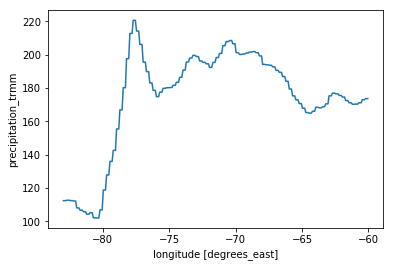

In [5]:
temp_avg = tmp.mean(dim = ["time","lat"], skipna=True) 
temp_avg.plot()

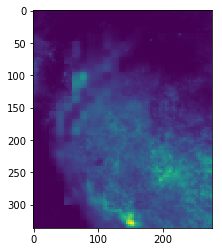

In [65]:
im = plt.imshow(tmp.isel(time=100), animated=True)

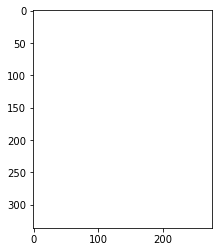

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(781):
    im = plt.imshow(tmp.isel(time=i), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save('dynamic_imagesPrec.mp4')

plt.show()